In [1]:
import os
import requests
import pandas as pd
import numpy as np
import quantstats as qs
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation
import matplotlib.pyplot as plt

In [3]:
load_dotenv()

True

In [8]:
api_key = os.getenv("ALPACA_API_KEY")
secret_key = os.getenv("ALPACA_SECRET_KEY")

In [9]:
alpaca = tradeapi.REST(
    api_key,
    secret_key,
    api_version="v2")

In [71]:
start_date = pd.Timestamp('2018-06-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-15', tz='America/New_York').isoformat()

tickers = ["MSFT", "SYY", "FDX", "RIO", "HD", "SBUX", "KO", "SPY"]
asset_weights = [0.2, 0.1, 0.15, 0.1, 0.2, 0.1, 0.15]
number_of_years = 5
investment_amount = 100000
sp500_weight = [1.0]


df_portfolio = alpaca.get_bars(
    tickers,
    timeframe="1Day",
    start = start_date,
    end = end_date
).df


In [87]:
MSFT = df_portfolio[df_portfolio['symbol']=='MSFT'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
SYY = df_portfolio[df_portfolio['symbol']=='SYY'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
FDX = df_portfolio[df_portfolio['symbol']=='FDX'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
RIO = df_portfolio[df_portfolio['symbol']=='RIO'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
HD = df_portfolio[df_portfolio['symbol']=='HD'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
SBUX = df_portfolio[df_portfolio['symbol']=='SBUX'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)
KO = df_portfolio[df_portfolio['symbol']=='KO'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)

SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop(['symbol', 'trade_count', 'vwap', 'high', 'low', 'volume', 'open'], axis=1)

stock_data_df = pd.concat([MSFT, SYY, FDX, RIO, HD, SBUX, KO], 
            axis=1, keys=["MSFT", "SYY", "FDX", "RIO", "HD", "SBUX", "KO"])
#stock_data_df= stock_data_df.rename(columns = {"close":""})
stock_data_df.index = stock_data_df.index.date

SPY_df = pd.concat([SPY], axis=1, keys=["SPY"])
#SPY_df = SPY_df.rename(columns = {"close":""})
SPY_df.index = SPY_df.index.date

stock_data_df= stock_data_df.dropna()
display(stock_data_df)
display(SPY_df)

,MSFT,SYY,FDX,RIO,HD,SBUX,KO
,close,close,close,close,close,close,close
2018-06-15,100.13,66.89,264.56,56.79,200.54,57.11,44.12
2018-06-18,100.86,66.75,263.67,57.06,200.69,57.22,43.55
2018-06-19,100.86,66.90,258.39,54.95,199.21,57.43,43.60
2018-06-20,101.87,67.42,251.43,55.07,199.08,52.22,43.26
2018-06-21,101.14,68.08,246.72,54.72,200.31,50.62,43.09
...,...,...,...,...,...,...,...
2023-06-09,326.81,72.54,223.76,64.57,297.35,97.94,60.47
2023-06-12,331.85,72.33,224.55,63.74,300.86,98.48,60.21
2023-06-13,334.29,72.76,228.87,65.60,300.08,99.26,60.45


,SPY
,close
2018-06-15,277.03
2018-06-18,276.59
2018-06-19,275.48
2018-06-20,276.01
2018-06-21,274.24
...,...
2023-06-09,429.90
2023-06-12,433.80
2023-06-13,436.66


In [88]:
stock_data = stock_data_df.pct_change()
stock_data = stock_data_df.dropna()
SPY = SPY.rename(columns = {"close":"SPY"})
SPY.index = SPY.index.date
SPY_data= SPY.pct_change()
SPY_data= SPY.dropna()
#display(stock_data)
#display(SPY_data)

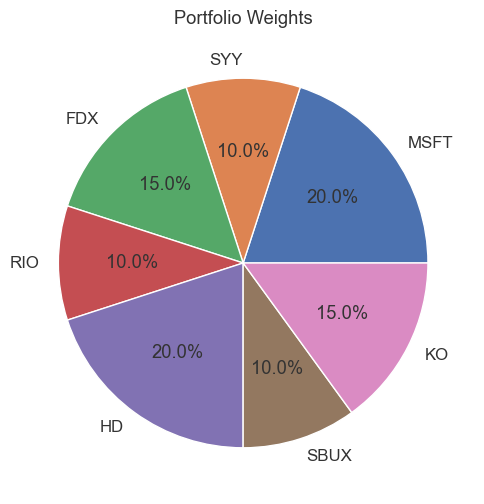

In [89]:
# Define the desired weights for each stock in the portfolio
# The weights should add up to 1 (or 100%)
weights = {
    'MSFT': 0.2,   # 20% weight
    'SYY': 0.1,    # 10% weight
    'FDX': 0.15,   # 15% weight
    'RIO': 0.1,    # 10% weight
    'HD': 0.2,     # 20% weight
    'SBUX': 0.1,   # 10% weight
    'KO': 0.15   # 15% weight
}

#---------------------------------------------

# Extract the stock symbols and weights
symbols = list(weights.keys())
weights_values = list(weights.values())

# Create a pie chart
plt.pie(weights_values, labels=symbols, autopct='%1.1f%%')

# Add a title
plt.title('Portfolio Weights')

# Display the chart
plt.show()

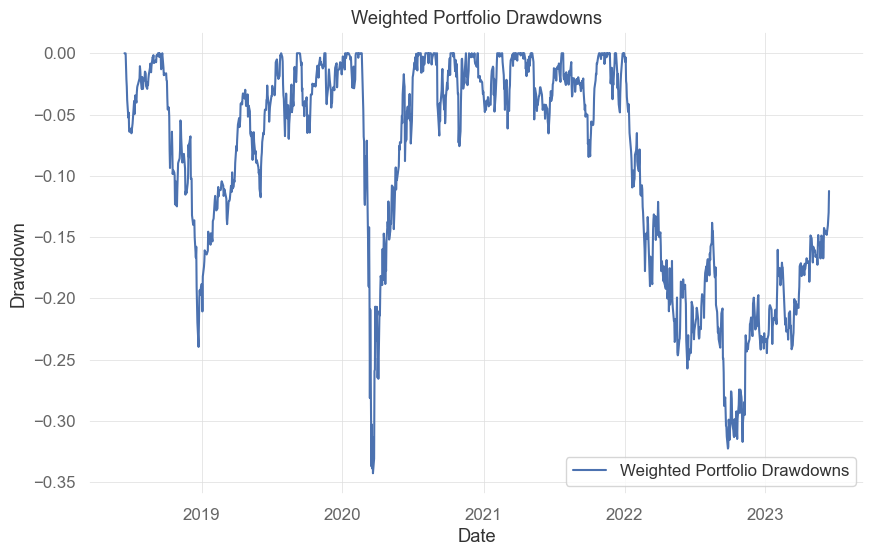

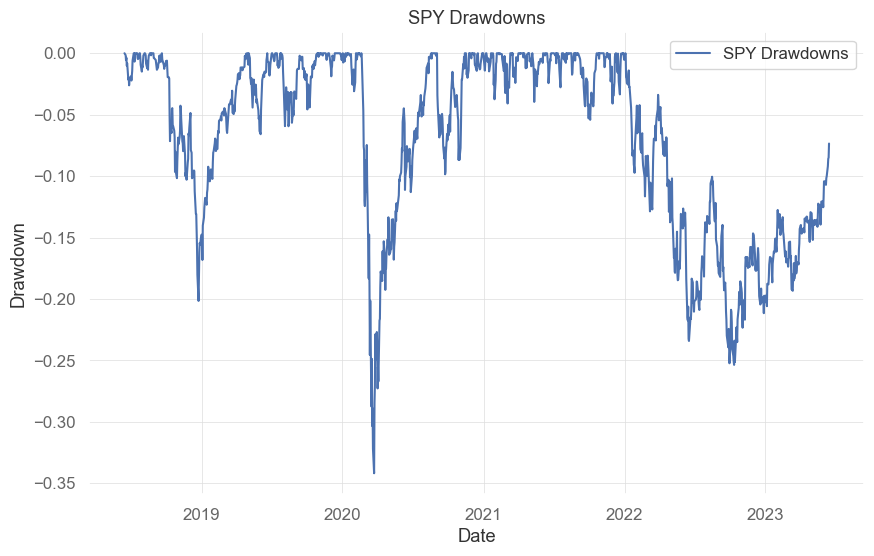

In [90]:
 #Visualizing the drawdowns of your portfolio and the benchmark can help you understand the downside risk and recovery periods.
    
###investment_amount = 100000

# Calculate portfolio value for stock_data_df
portfolio_value = stock_data_df * 100000

# Calculate portfolio value for SPY_df
spy_portfolio_value = SPY_df * 100000

# Calculate the weighted portfolio value for stock_data_df
portfolio_value_weighted = (stock_data_df * weights_values).sum(axis=1) * 100000

# Calculate drawdowns for stock_data_df
stock_drawdowns = (portfolio_value_weighted / portfolio_value_weighted.cummax()) - 1

# Calculate drawdowns for SPY_df
spy_drawdowns = (spy_portfolio_value / spy_portfolio_value.cummax()) - 1

# Plot drawdowns for stock_data_df
plt.figure(figsize=(10, 6))
plt.plot(stock_drawdowns.index, stock_drawdowns.values, label='Weighted Portfolio Drawdowns')
plt.title('Weighted Portfolio Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()

# Plot drawdowns for SPY_df
plt.figure(figsize=(10, 6))
plt.plot(spy_drawdowns.index, spy_drawdowns.values, label='SPY Drawdowns')
plt.title('SPY Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()


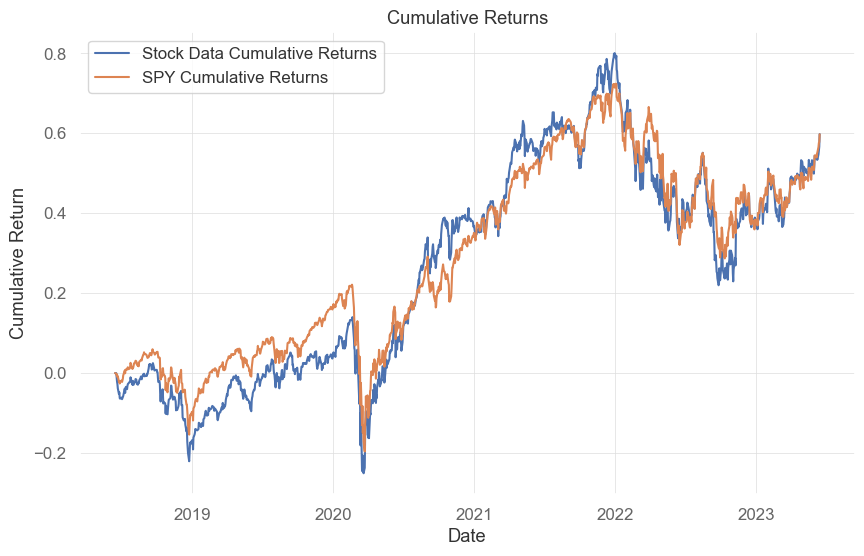

In [91]:
# Calculate cumulative returns for stock_data_df
stock_cumulative_returns = (portfolio_value_weighted / portfolio_value_weighted.iloc[0]) - 1

# Calculate cumulative returns for SPY_df
spy_cumulative_returns = (spy_portfolio_value / spy_portfolio_value.iloc[0]) - 1

# Plot cumulative returns for stock_data_df and SPY_df
plt.figure(figsize=(10, 6))
plt.plot(stock_cumulative_returns.index, stock_cumulative_returns.values, label='Stock Data Cumulative Returns')
plt.plot(spy_cumulative_returns.index, spy_cumulative_returns.values, label='SPY Cumulative Returns')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [92]:
weights = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]

# Calculate portfolio return
stock_data = stock_data_df.dot(weights)

# Display sample data
stock_data

2018-06-15    112.877143
2018-06-18    112.828571
2018-06-19    111.620000
2018-06-20    110.050000
2018-06-21    109.240000
                 ...    
2023-06-09    163.348571
2023-06-12    164.574286
2023-06-13    165.901429
2023-06-14    166.904286
2023-06-15    170.131429
Length: 1259, dtype: float64

In [93]:
combined_data =pd.concat(
    [stock_data, SPY_data], axis="columns", join="inner",
)

combined_data.head()

,0,SPY
2018-06-15,112.877143,277.03
2018-06-18,112.828571,276.59
2018-06-19,111.620000,275.48
2018-06-20,110.050000,276.01
2018-06-21,109.240000,274.24


<Axes: title={'center': 'Box Plot'}>

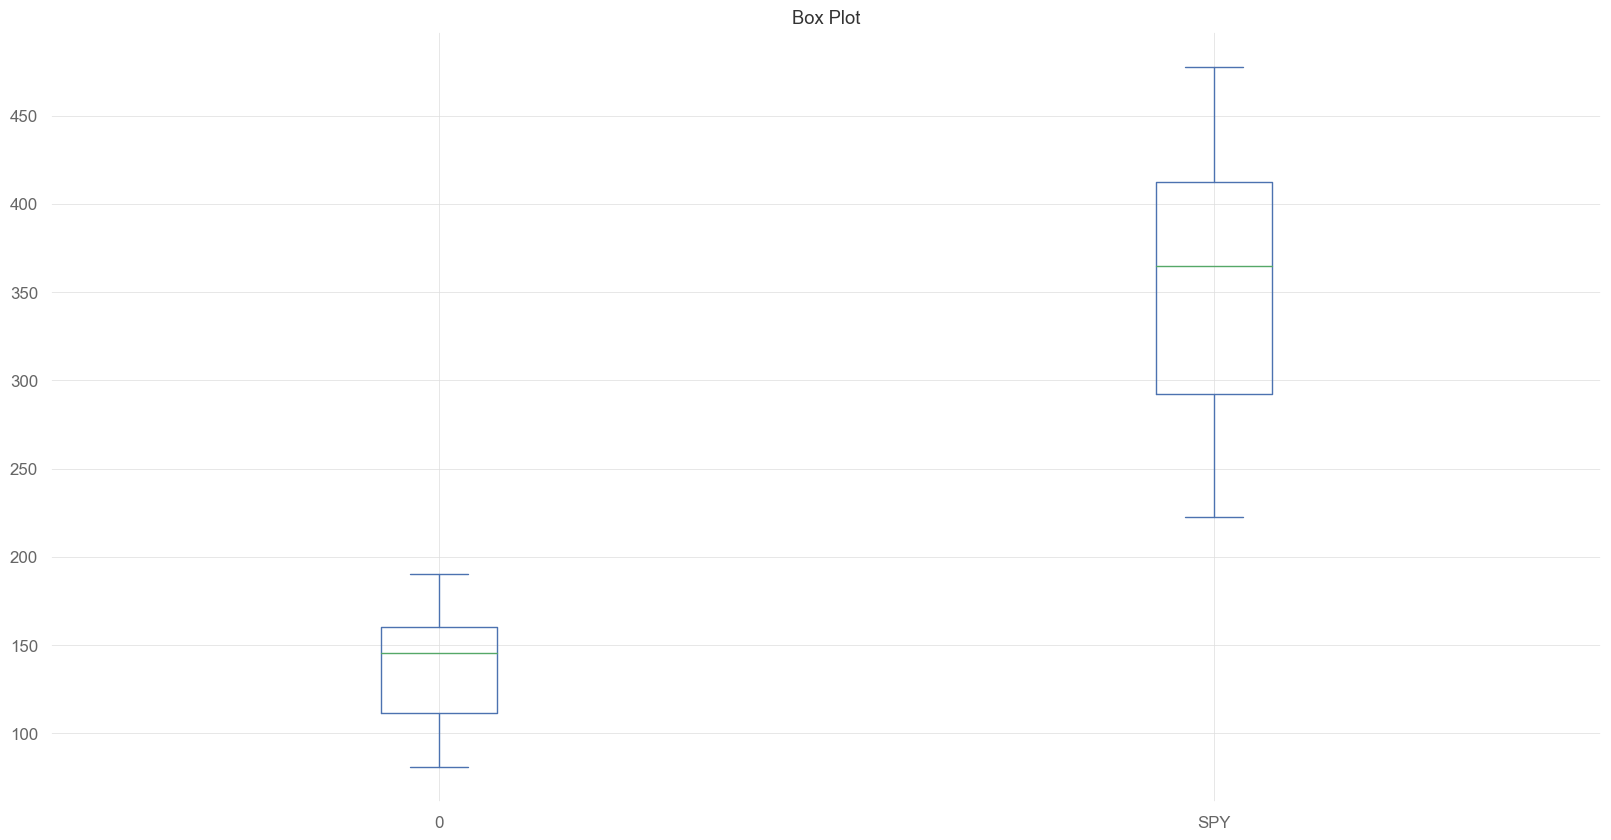

In [94]:
combined_data.plot.box(figsize=(20, 10),title= 'Box Plot')

In [95]:
combined_data_std= combined_data.std()
combined_data_std

0      27.053010
SPY    64.526972
dtype: float64

In [96]:
annualized_std = combined_data_std * np.sqrt(252)
annualized_std

0       429.453225
SPY    1024.333924
dtype: float64

In [97]:
sharpe_ratios = ((combined_data.mean()) * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios

0      80.982510
SPY    87.736152
dtype: float64

<Axes: title={'center': 'Sharpe Ratio'}>

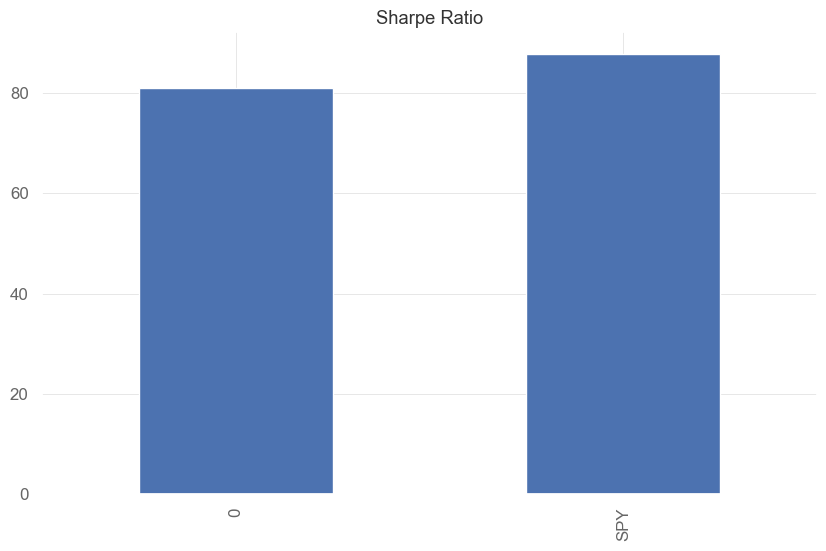

In [98]:
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio')

<Axes: title={'center': 'Rolling 30-Day Beta'}>

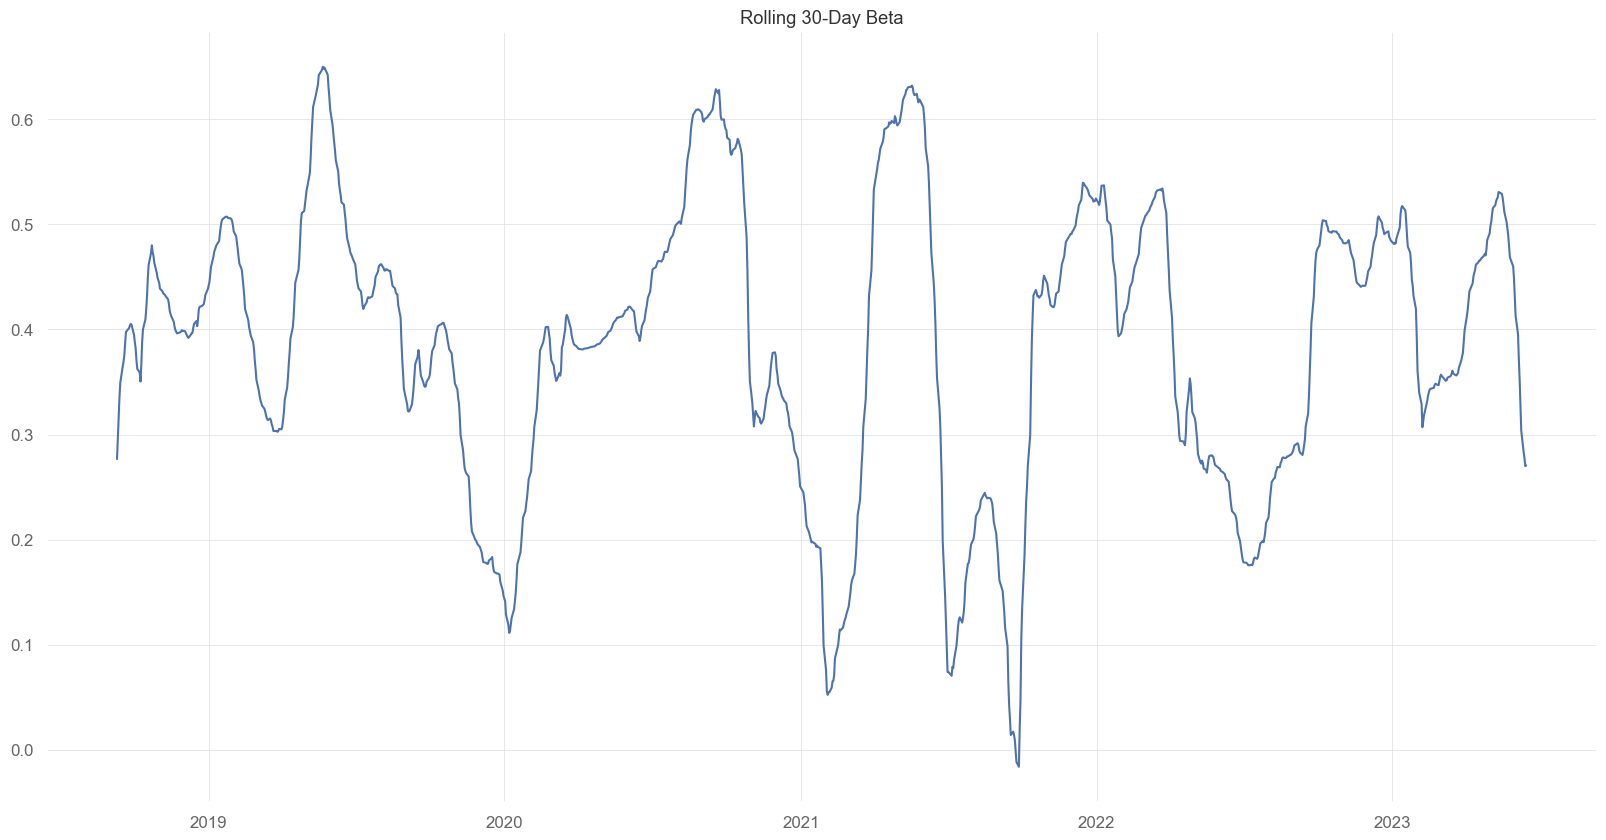

In [99]:
rolling_covariance = stock_data.rolling(window=60).cov(combined_data['SPY'])
rolling_covariance.tail()
rolling_variance = combined_data['SPY'].rolling(window=60).var()
rolling_variance.tail()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta')

In [101]:
# Configuring a Monte Carlo simulation for the portfolio
MC_portfolio = MCSimulation(
    portfolio_data = stock_data_df,
    weights = asset_weights,
    num_simulation = 250,
    num_trading_days = 252*number_of_years
)

# Configuring a Monte Carlo simulation for the S&P 500 comparison
MC_SP500 = MCSimulation(
    portfolio_data = SPY_df,
    weights = sp500_weight,
    num_simulation = 250,
    num_trading_days = 252*number_of_years
)


In [102]:
MC_portfolio.calc_cumulative_return()
MC_SP500.calc_cumulative_return()

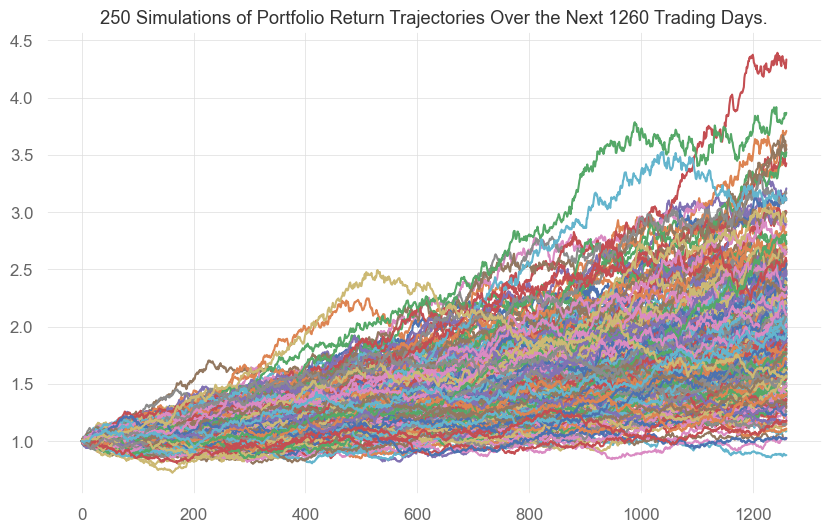

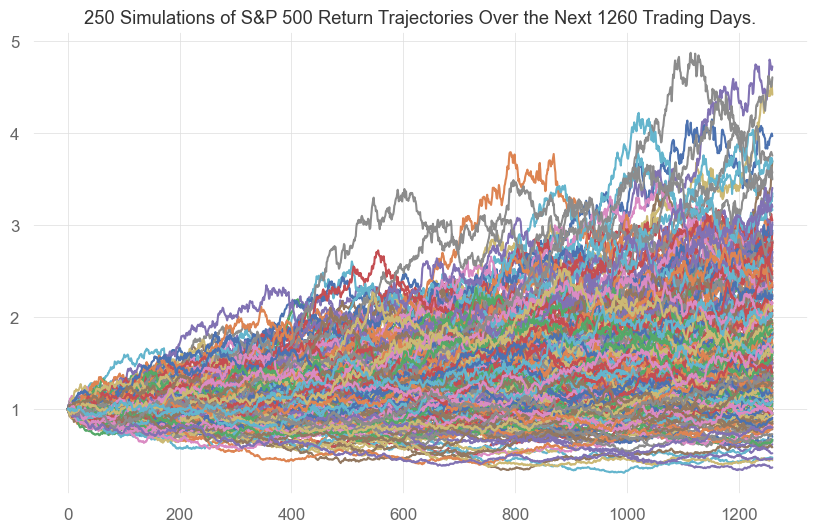

In [103]:
MC_portfolio_plot = MC_portfolio.plot_simulation() 
MC_sp500_plot = MC_SP500.plot_simulation2()

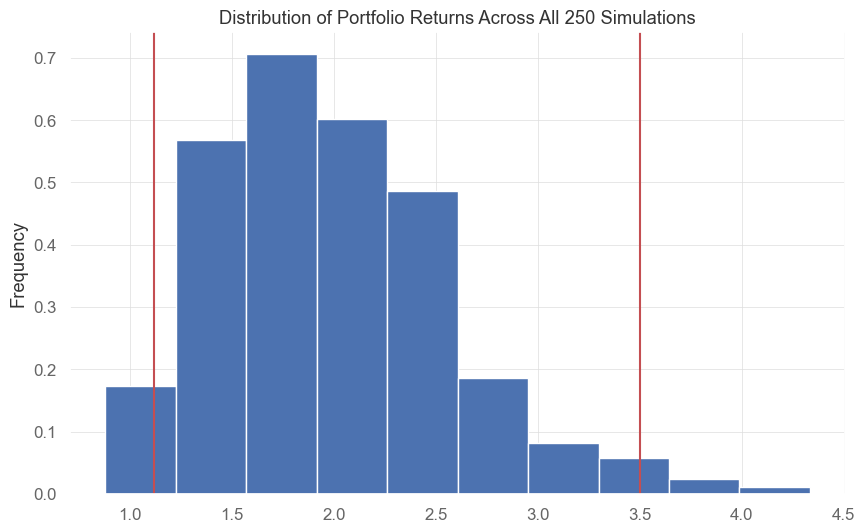

In [104]:
portfolio_dist_plot = MC_portfolio.plot_distribution()

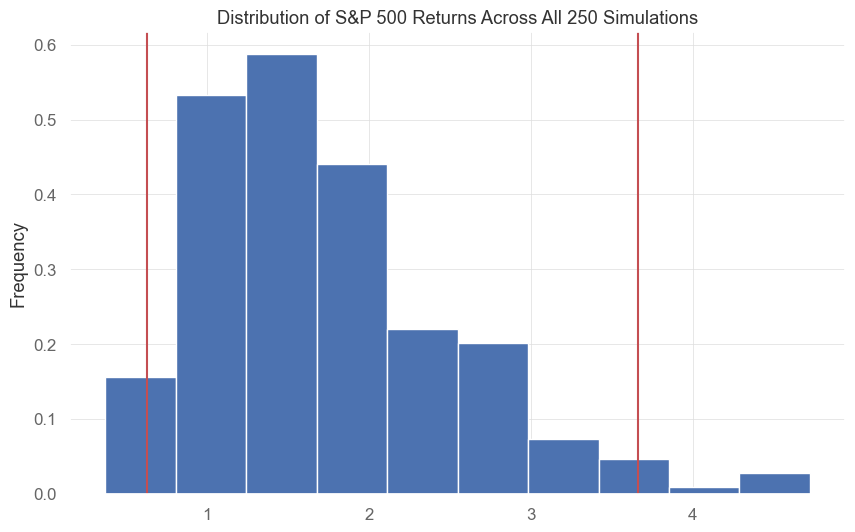

In [105]:
sp500_dist_plot = MC_SP500.plot_distribution2()

In [106]:
# Fetch summary statistics from the Monte Carlo simulation results
portfolio_summary_statistics = MC_portfolio.summarize_cumulative_return()
sp500_summary_statistics = MC_SP500.summarize_cumulative_return()

# Print summary statistics
#print(summary_statistics)


portfolio_ci_lower = round(portfolio_summary_statistics[8]*investment_amount,2)
portfolio_ci_upper = round(portfolio_summary_statistics[9]*investment_amount,2)
portfolio_mean_result = round(portfolio_summary_statistics[1]*investment_amount,2)
portfolio_twenty_fifth = round(portfolio_summary_statistics[4]*investment_amount,2)
portfolio_seventy_fifth = round(portfolio_summary_statistics[6]*investment_amount,2)
portfolio_min_result = round(portfolio_summary_statistics[3]*investment_amount,2)
portfolio_max_result = round(portfolio_summary_statistics[7]*investment_amount,2)

sp500_ci_lower = round(sp500_summary_statistics[8]*investment_amount,2)
sp500_ci_upper = round(sp500_summary_statistics[9]*investment_amount,2)
sp500_mean_result = round(sp500_summary_statistics[1]*investment_amount,2)
sp500_twenty_fifth = round(sp500_summary_statistics[4]*investment_amount,2)
sp500_seventy_fifth = round(sp500_summary_statistics[6]*investment_amount,2)
sp500_min_result = round(sp500_summary_statistics[3]*investment_amount,2)
sp500_max_result = round(sp500_summary_statistics[7]*investment_amount,2)


# Print results
print(f"\nPORTFOLIO SIMULATION RESULTS                                S&P500 SIMULATION RESULTS\n")
print(f"\nInvestment amount = ${investment_amount}                                  Investment amount = ${investment_amount}")
print(f"Simulation Duration = {number_of_years} years                               Simulation Duration = {number_of_years} years\n")
print(f"95% Confidence Range = ${portfolio_ci_lower} to ${portfolio_ci_upper}               95% Confidence Range = ${sp500_ci_lower} to ${sp500_ci_upper}")
print(f"25th-75th Percentile = ${portfolio_twenty_fifth} to ${portfolio_seventy_fifth}              25th-75th Percentile = ${sp500_twenty_fifth} to ${sp500_seventy_fifth}\n")
print(f"Mean Outcome = ${portfolio_mean_result}                                    Mean Outcome = ${sp500_mean_result}\n")
print(f"Min Outcome = ${portfolio_min_result}                                      Min Outcome = ${sp500_min_result}")
print(f"Max Outcome = ${portfolio_max_result}                                    Max Outcome = ${sp500_max_result}\n")


PORTFOLIO SIMULATION RESULTS                                S&P500 SIMULATION RESULTS


Investment amount = $100000                                  Investment amount = $100000
Simulation Duration = 5 years                               Simulation Duration = 5 years

95% Confidence Range = $111892.55 to $350161.24               95% Confidence Range = $62735.98 to $366446.72
25th-75th Percentile = $156784.63 to $233137.62              25th-75th Percentile = $114784.35 to $211336.58

Mean Outcome = $197996.69                                    Mean Outcome = $172346.52

Min Outcome = $87846.44                                      Min Outcome = $36986.81
Max Outcome = $433333.64                                    Max Outcome = $472381.52

